In [1]:
from collections import defaultdict

In [2]:
anagrams=defaultdict(set)

In [3]:
''.join(sorted("bca"))

'abc'

In [4]:
with open ("words_alpha.txt",'r') as f:
    while word:=f.readline():
        word=word.strip()
        key=''.join(sorted(word))
        anagrams[key].add(word)

In [5]:
cleaned_anagrams=[]

In [6]:
for key in anagrams.keys():
    if len(anagrams[key])>2 and len(next(iter(anagrams[key])))==7:
        cleaned_anagrams.append(anagrams[key])

In [7]:
len(cleaned_anagrams)

1699

In [8]:
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np

In [9]:
def find_perms(word1, word2, visited, permute=[]):
    if len(permute) == len(word1): # We found a valid permutation
        yield permute
        return
    for i in range(len(word1)): # Try all positions
        if visited[i]: # Skip if visited
            continue
        if word1[i] != word2[len(permute)]: # Check if we can map the word1 character to be next word2 character
            continue
        visited[i] = True
        yield from find_perms(word1, word2, visited, permute + [i+1])
        visited[i] = False # Unmark the position

word1 = 'abidden'
word2 = 'bandied'
visited = [False] * len(word1)
for perm in find_perms(word1, word2, visited):
    print(perm)


[2, 1, 7, 4, 3, 6, 5]
[2, 1, 7, 5, 3, 6, 4]


In [10]:
from itertools import permutations

P=7

# Define your list of elements
elements = list(range(1,P+1))

# Generate all permutations of size 6
all_permutations = permutations(elements, P)

# Convert the permutations to a list for easy printing or further processing
all_permutations_list = list(all_permutations)

In [11]:
all_permutations_dict={
}
reverse_all_permutations_dict={}

In [12]:
for i,permutation in enumerate(all_permutations_list):
    permut=reduce(lambda x, y: x * 10 + y, permutation)
    all_permutations_dict[permut]=i
    reverse_all_permutations_dict[i]=permut

In [13]:
X=[]
Y=[]
for anagram_set in cleaned_anagrams:
    words_list = list(anagram_set)
    for i in range(len(words_list)):
        for j in range(i + 1, len(words_list)):
            word1, word2 = words_list[i], words_list[j]
            visited = [False] * len(word1)
            for perm in find_perms(word1, word2, visited):
                X.append(word1)
                Y.append(all_permutations_dict[
                    reduce(lambda x, y: x * 10 + y, perm)
                ])

In [14]:
def one_hot_encode(number, total_values):
    encoded = np.zeros(total_values)
    encoded[number] = 1
    return encoded

In [15]:
import math
nb_permutations=math.factorial(7)
for i,y in enumerate(Y):
    Y[i]=  one_hot_encode(y,nb_permutations)


In [16]:
Y=np.array(Y)

In [17]:
letters=set.union(*(set(l for l in w) for w in X))
nb_letters=len(letters)

In [18]:
from sklearn.preprocessing import OneHotEncoder
letter_to_index=dict(zip(letters,list(range(len(letters)))))
X = [[ one_hot_encode(letter_to_index[l],nb_letters) for l in word] for word in X]
X = np.array(X)


In [19]:
X.shape

(15929, 7, 25)

In [20]:
Y.shape

(15929, 5040)

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X and Y are your input and output data
X_shape = X.shape
Y_shape = Y.shape

# Reshape X to be a 2D array
X_reshaped = X.reshape((X_shape[0], -1))

# Create a one-layer neural network
model = Sequential()
#model.add(Dense(units=5, input_shape=(X_reshaped.shape[1],), activation='relu'))  # Intermediary layer
model.add(Dense(units=Y_shape[1], input_shape=(X_reshaped.shape[1],), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Train the model
history = model.fit(X_reshaped, Y, epochs=2, batch_size=32, validation_split=0.1, )


Epoch 1/2
448/448 [==============================] - 18s 37ms/step - loss: 8.3497 - val_loss: 8.0582
Epoch 2/2
448/448 [==============================] - 16s 35ms/step - loss: 6.4962 - val_loss: 7.8878


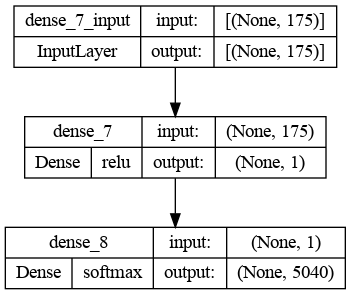

In [35]:
tf.keras.utils.plot_model(model, show_shapes=True,show_layer_activations=True,)

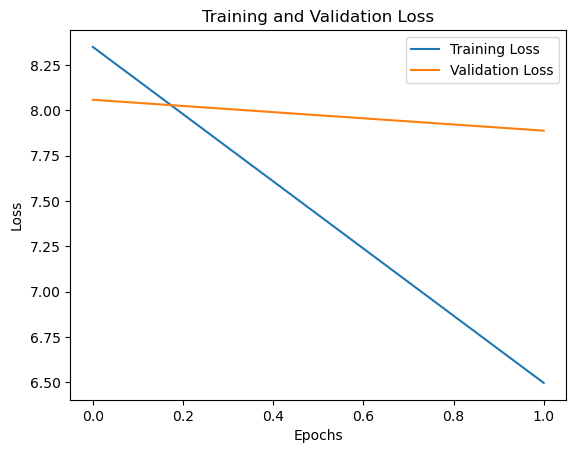

In [42]:
# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
#word_test="testing"
word_test="mondial"

K=5

predictions=model(
np.array([[ one_hot_encode(letter_to_index[l],nb_letters) for l in word_test]]).reshape(1,-1)
)

top_k_indices = np.argsort(predictions[0])[-K:]

top_k_results = sorted( [(index, float(predictions[0][index])) for index in top_k_indices],key=lambda x:-x[1])


def switch_string(original_string, permutation):
    switched_string = ''.join(original_string[int(index)-1] for index in permutation)
    return switched_string

for index, precision in top_k_results:
    print(
        switch_string(
word_test,
        str(reverse_all_permutations_dict[index]).zfill(7)

        ),
        precision
        
        )


mondila 0.012105055153369904
aimondl 0.0077787842601537704
moindla 0.004441909957677126
nomdial 0.004292315803468227
lmondia 0.003974355291575193
